# Section 4: Pytesseract in Python :

In [53]:
# importing libraries :
import cv2
import pytesseract as ps
from PIL import Image
import matplotlib.pyplot as plt
import re

In [15]:
def cv2_imshow(img):
    if isinstance(img, str):
        img = cv2.imread(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

## 1. Extract Text from image :

In [16]:
img = Image.open("./images/text_image.png")

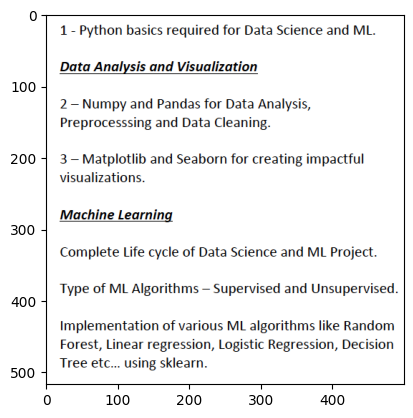

In [17]:
cv2_imshow("./images/text_image.png")

## 1. Image to String :

In [10]:
ext_text = ps.image_to_string(img)

In [11]:
print(ext_text) 

1 - Python basics required for Data Science and ML.

Data Analysis and Visualization

2—Numpy and Pandas for Data Analysis,
Preprocesssing and Data Cleaning.

3 —Matplotlib and Seaborn for creating impactful
visualizations.

Machine Learning

Complete Life cycle of Data Science and ML Project.
Type of ML Algorithms — Supervised and Unsupervised.
Implementation of various ML algorithms like Random

Forest, Linear regression, Logistic Regression, Decision
Tree etc... using sklearn.



## 2. Getting Boxes Around Text : 

In [18]:
img_box = Image.open("./images/table.png") 

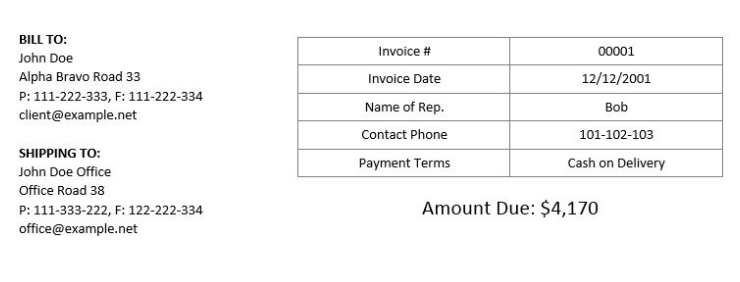

In [19]:
img_box

In [22]:
data_dict = ps.image_to_data(img_box, output_type=ps.Output.DICT)

In [24]:
data_dict.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [36]:
n_boxes = len(data_dict["text"])

In [47]:
n_img = cv2.imread("./images/table.png")

In [48]:
cols = ['left', 'top', 'width', 'height']
for i in range(n_boxes):
    if int(data_dict["conf"][i]) > 70:
        x, y ,w, h = (data_dict[col][i] for col in cols)
        n_img = cv2.rectangle(n_img, (x, y), (x+w, y+h), (0, 255, 0), 1)

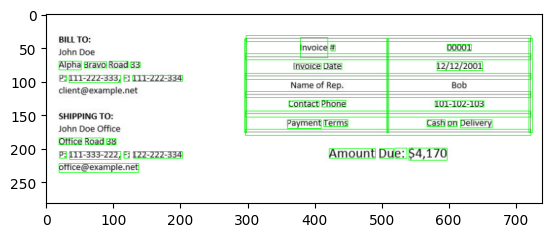

In [49]:
cv2_imshow(n_img)

## 3. Text Template Matching : 

In [57]:
set(data_dict["text"])

{'',
 ' ',
 '#',
 '$4,170',
 '00001',
 '101-102-103',
 '111-222-333,',
 '111-222-334',
 '111-333-222,',
 '12/12/2001',
 '122-222-334',
 '33',
 '38',
 'Alpha',
 'Amount',
 'BILL',
 'Bo',
 'Bravo',
 'Cash',
 'Contact',
 'Date',
 'Delivery',
 'Die.',
 'Due:',
 'F:',
 'Holin',
 'Invoice',
 'Nemect',
 'Office',
 'P:',
 'Payment',
 'Phone',
 'Ren!',
 'Road',
 'TO:',
 'Terms',
 'an',
 'client@example.net',
 'office@example.net',
 'on',
 'supine'}

In [58]:
list(filter(lambda t : re.match(r"../../....", t), set(data_dict["text"])))

['12/12/2001']